In [1]:
import numpy
import os

os.environ["OMP_NUM_THREADS"] = "1"

In [2]:

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

df = pd.read_csv("awm_customers.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


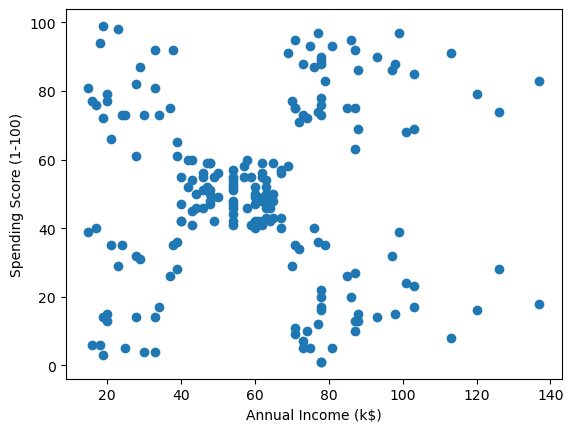

In [3]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Let's take a look at the dataset:

In [4]:
# Some column names are too long, let's shorten them:
df.rename(columns = {'Annual Income (k$)':'income'}, inplace = True)
df.rename(columns = {'Spending Score (1-100)':'score'}, inplace = True)

### Remember, you must normalize your data before printing data to your model!

In [5]:
#For normalization, we will use the MinMaxScaler() function found in the sklearn library:

scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['score']])
df['score'] = scaler.transform(df[['score']])

df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [6]:
df.tail()

,CustomerID,income,score
195,196,0.860656,0.795918
196,197,0.909836,0.275510
197,198,0.909836,0.744898
198,199,1.000000,0.173469
199,200,1.000000,0.836735


In [7]:
### Let's Determine the K Value First (using the Elbow Method)

In [14]:

k_range = range(1,11)

list_dist = []

for k in k_range:
    kmeans_modal = KMeans(n_clusters=k)
    kmeans_modal.fit(df[['income','score']])
    list_dist.append(kmeans_modal.inertia_)

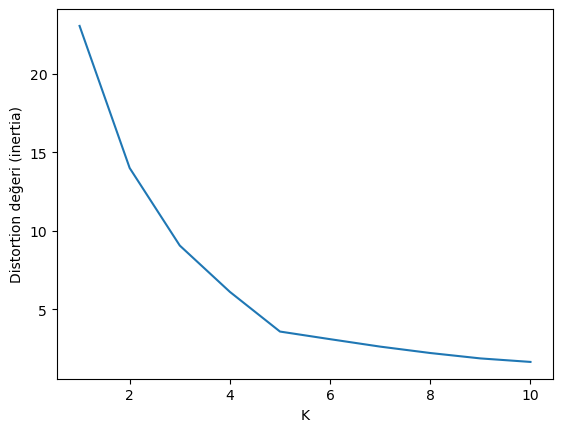

In [9]:

plt.xlabel('K')
plt.ylabel('Distortion value (inertia)')
plt.plot(k_range,list_dist)
plt.show()

#### Best K value = 5

In [15]:
# Let's create a K-Means model for K = 5:
kmeans_modal = KMeans(n_clusters = 5)
y_predicted = kmeans_modal.fit_predict(df[['income','score']])
y_predicted

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [11]:
df['cluster'] = y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,3
1,2,0.000000,0.816327,4
2,3,0.008197,0.051020,3
3,4,0.008197,0.775510,4
4,5,0.016393,0.397959,3


In [12]:
# Let's see the centroids:
kmeans_modal.cluster_centers_   

array([[0.6       , 0.16443149],
       [0.33029751, 0.49508692],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432],
       [0.08792846, 0.79962894]])

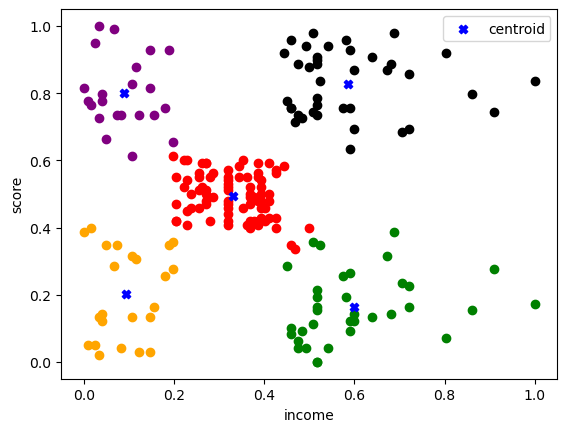

In [17]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]


plt.xlabel('income')
plt.ylabel('score')
plt.scatter(df1['income'],df1['score'],color='green')
plt.scatter(df2['income'],df2['score'],color='red')
plt.scatter(df3['income'],df3['score'],color='black')
plt.scatter(df4['income'],df4['score'],color='orange')
plt.scatter(df5['income'],df5['score'],color='purple')


## Since kmeans_modal.cluster_centers_ numpy is a 2-dimensional array, we take the x and y columns as kmeans_modal.cluster_centers_[:,0] and kmeans_modal.cluster_centers_[:,1] for the scatter plot:
plt.scatter(kmeans_modal.cluster_centers_[:,0], kmeans_modal.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()

